# This Notebook is to use the GMM to test the connection between CO2 and Antarctic T

In [22]:
# load the data
data_path='D:/VScode/GMM_carbon/data'

import pandas as pd
# co2 data from Bereiter et al., 2015
co2=pd.read_csv(data_path+'/CO2B15.csv')


# Antarctic T data from Jouzel et al., 2007

with open(data_path+'/Jouzel_etal_2007.txt', 'r', encoding='latin1') as f:
    at = pd.read_csv(f, sep='\s+', skiprows=104)

# rename the columns
at.columns=['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature']

# get the Age and Temperature column
at=at[['Age', 'Temperature']]
at = at[~np.isnan(at).any(axis=1)]



In [23]:
print(np.isnan(at).sum())

Age            0
Temperature    0
dtype: int64


In [24]:
at

,Age,Temperature
0,46.81203,1.84
1,55.05624,3.04
2,64.41511,0.35
3,73.15077,-0.42
4,81.93244,0.05
...,...,...
5782,797408.00000,-8.73
5783,798443.00000,-8.54
5784,799501.00000,-8.88
5785,800589.00000,-8.92


In [26]:
co2

,Age,CO2
0,-51.03,368.02
1,-48.00,361.78
2,-46.28,359.65
3,-44.41,357.11
4,-43.08,353.95
...,...,...
1896,803925.28,202.92
1897,804009.87,207.50
1898,804522.67,204.86
1899,805132.44,202.23


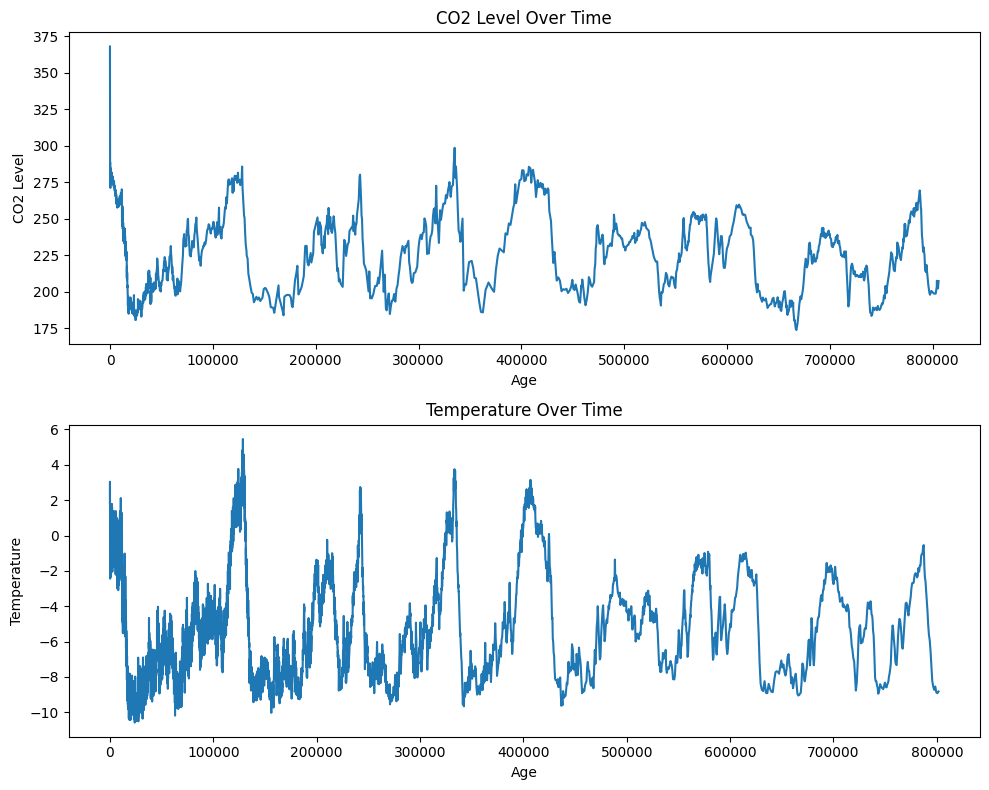

In [25]:
# plot the CO2 and AT
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column figure

# Plot for co2 (assuming co2 has columns 'Age' and 'CO2_Level' or equivalent)
axes[0].plot(co2['Age'], co2['CO2'])  # replace 'CO2_Level' with the appropriate column name for CO2 data
axes[0].set_title('CO2 Level Over Time')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('CO2 Level')

# Plot for at
axes[1].plot(at['Age'], at['Temperature'])
axes[1].set_title('Temperature Over Time')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Temperature')

# Automatically adjust the layout
plt.tight_layout()
plt.show()



# plot the distributioin of age gaps

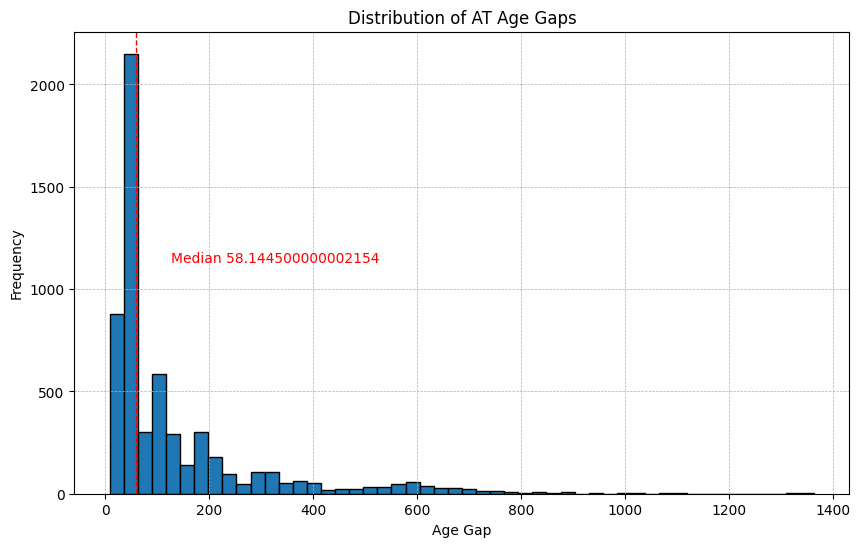

In [26]:
age_gaps = at['Age'].diff().dropna()  # dropna() to remove the first NaN value
median_gap = age_gaps.median()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(age_gaps, bins=50, edgecolor='black')  # Adjust bins as needed

# Add the vertical line for the median
plt.axvline(median_gap, color='red', linestyle='dashed', linewidth=1)
plt.text(median_gap + 0.05 * max(age_gaps), 0.5 * plt.gca().get_ylim()[1], f'Median {median_gap}', color='red')

plt.title('Distribution of AT Age Gaps')
plt.xlabel('Age Gap')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



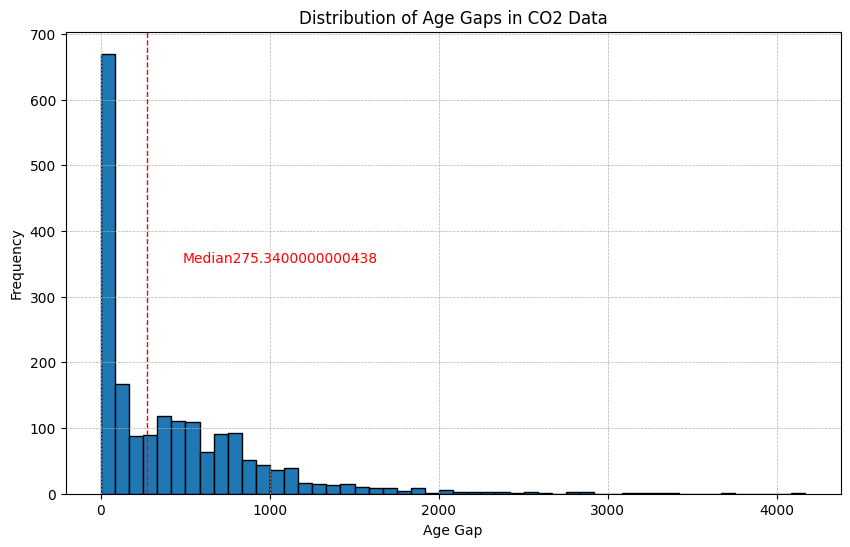

In [27]:
co2_age_gaps = co2['Age'].diff().dropna()
co2_median_gap = co2_age_gaps.median()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(co2_age_gaps, bins=50, edgecolor='black')

# Add the vertical line for the median
plt.axvline(co2_median_gap, color='red', linestyle='dashed', linewidth=1)
plt.text(co2_median_gap + 0.05 * max(co2_age_gaps), 0.5 * plt.gca().get_ylim()[1], f'Median{co2_median_gap}', color='red')

plt.title('Distribution of Age Gaps in CO2 Data')
plt.xlabel('Age Gap')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# interpolate the data, here I choose 300 as according to the age gap distribution shown above

In [28]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Create the vector t
t = np.arange(1000, 800001, 300)

# Interpolating for the 'at' DataFrame
f_at = interp1d(at['Age'], at['Temperature'], kind='linear', fill_value="extrapolate")
temperature_interp = f_at(t)

# Create a new DataFrame for interpolated 'at' values
at_interp = pd.DataFrame({
    'Age': t,
    'Temperature': temperature_interp
})

# Interpolating for the 'co2' DataFrame
f_co2 = interp1d(co2['Age'], co2['CO2'], kind='linear', fill_value="extrapolate")
co2_level_interp = f_co2(t)

# Create a new DataFrame for interpolated 'co2' values
co2_interp = pd.DataFrame({
    'Age': t,
    'CO2': co2_level_interp
})



In [29]:
print(np.isnan(at_interp).sum())


Age            0
Temperature    0
dtype: int64


# visualize the interpolated data to for checking

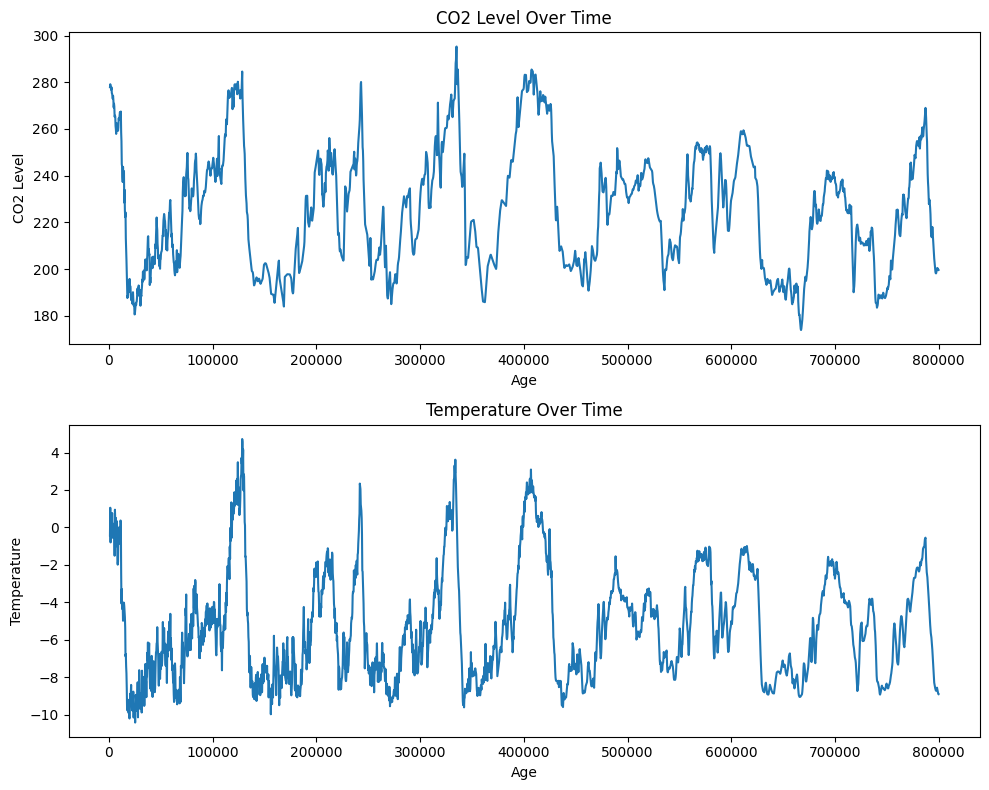

In [30]:
# plot the CO2 and AT
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column figure

# Plot for co2 (assuming co2 has columns 'Age' and 'CO2_Level' or equivalent)
axes[0].plot(co2_interp['Age'], co2_interp['CO2'])  # replace 'CO2_Level' with the appropriate column name for CO2 data
axes[0].set_title('CO2 Level Over Time')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('CO2 Level')

# Plot for at
axes[1].plot(at_interp['Age'], at_interp['Temperature'])
axes[1].set_title('Temperature Over Time')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Temperature')

# Automatically adjust the layout
plt.tight_layout()
plt.show()

# make a scatter plot for CO2 and AT

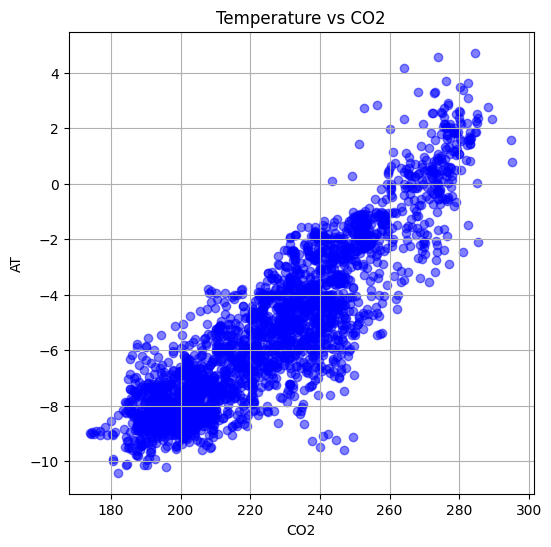

In [31]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(co2_interp['CO2'], at_interp['Temperature'], color='blue', alpha=0.5)
plt.title('Temperature vs CO2')
plt.xlabel('CO2')
plt.ylabel('AT')
plt.grid(True)
plt.show()


# Make a scatter plot for diff(CO2) and diff(AT)

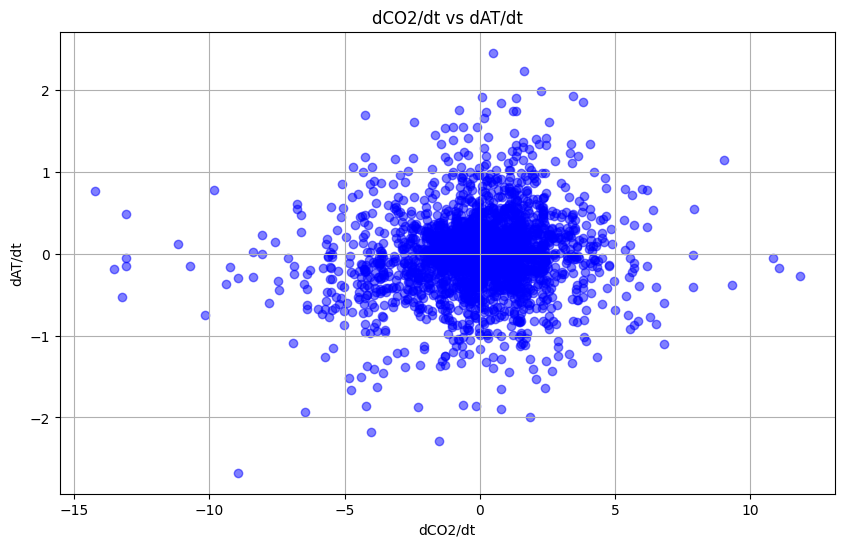

In [32]:
import matplotlib.pyplot as plt

# Calculate the differences
co2_diff = co2_interp['CO2'].diff()
at_diff = at_interp['Temperature'].diff()

# Scatter plot for differences
plt.figure(figsize=(10, 6))
plt.scatter(co2_diff, at_diff, color='blue', alpha=0.5)
plt.title('dCO2/dt vs dAT/dt')
plt.xlabel('dCO2/dt')
plt.ylabel('dAT/dt')
plt.grid(True)
plt.show()


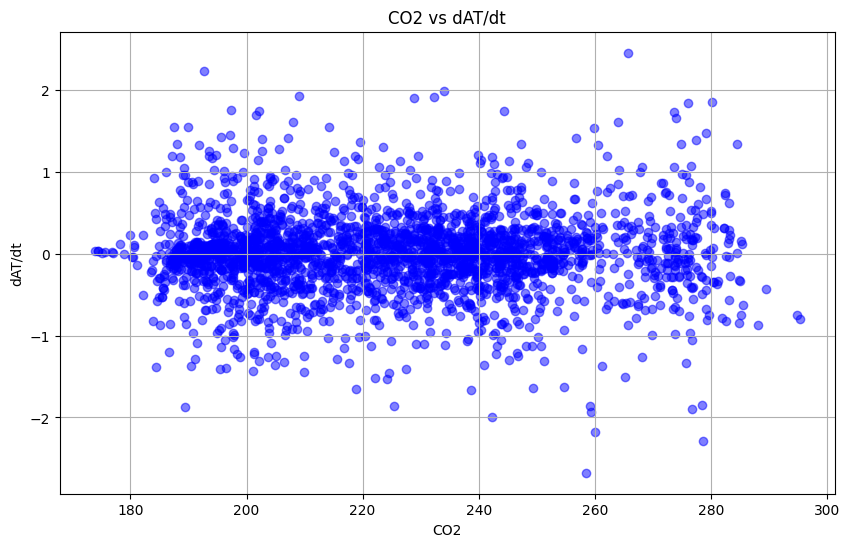

In [33]:
import matplotlib.pyplot as plt

# Calculate the differences

at_diff = at_interp['Temperature'].diff()

# Scatter plot for differences
plt.figure(figsize=(10, 6))
plt.scatter(co2_interp['CO2'], at_diff, color='blue', alpha=0.5)
plt.title('CO2 vs dAT/dt')
plt.xlabel('CO2')
plt.ylabel('dAT/dt')
plt.grid(True)
plt.show()

# Doing GMM on CO2 and AT

In [34]:
import numpy as np

# Combine the CO2 and Temperature columns into a single ndarray
co2_values = co2_interp['CO2'].values.reshape(-1, 1)
temperature_values = at_interp['Temperature'].values.reshape(-1, 1)
co2_at = np.hstack((co2_values, temperature_values))
co2_at = co2_at[~np.isnan(co2_at).any(axis=1)]

co2_at

array([[277.88460938,  -0.42737296],
       [279.12946551,   1.05244727],
       [278.51678482,  -0.79679709],
       ...,
       [200.05166254,  -8.81540643],
       [199.83911812,  -8.88363971],
       [199.62657369,  -8.89466912]])

# Calculate AIC

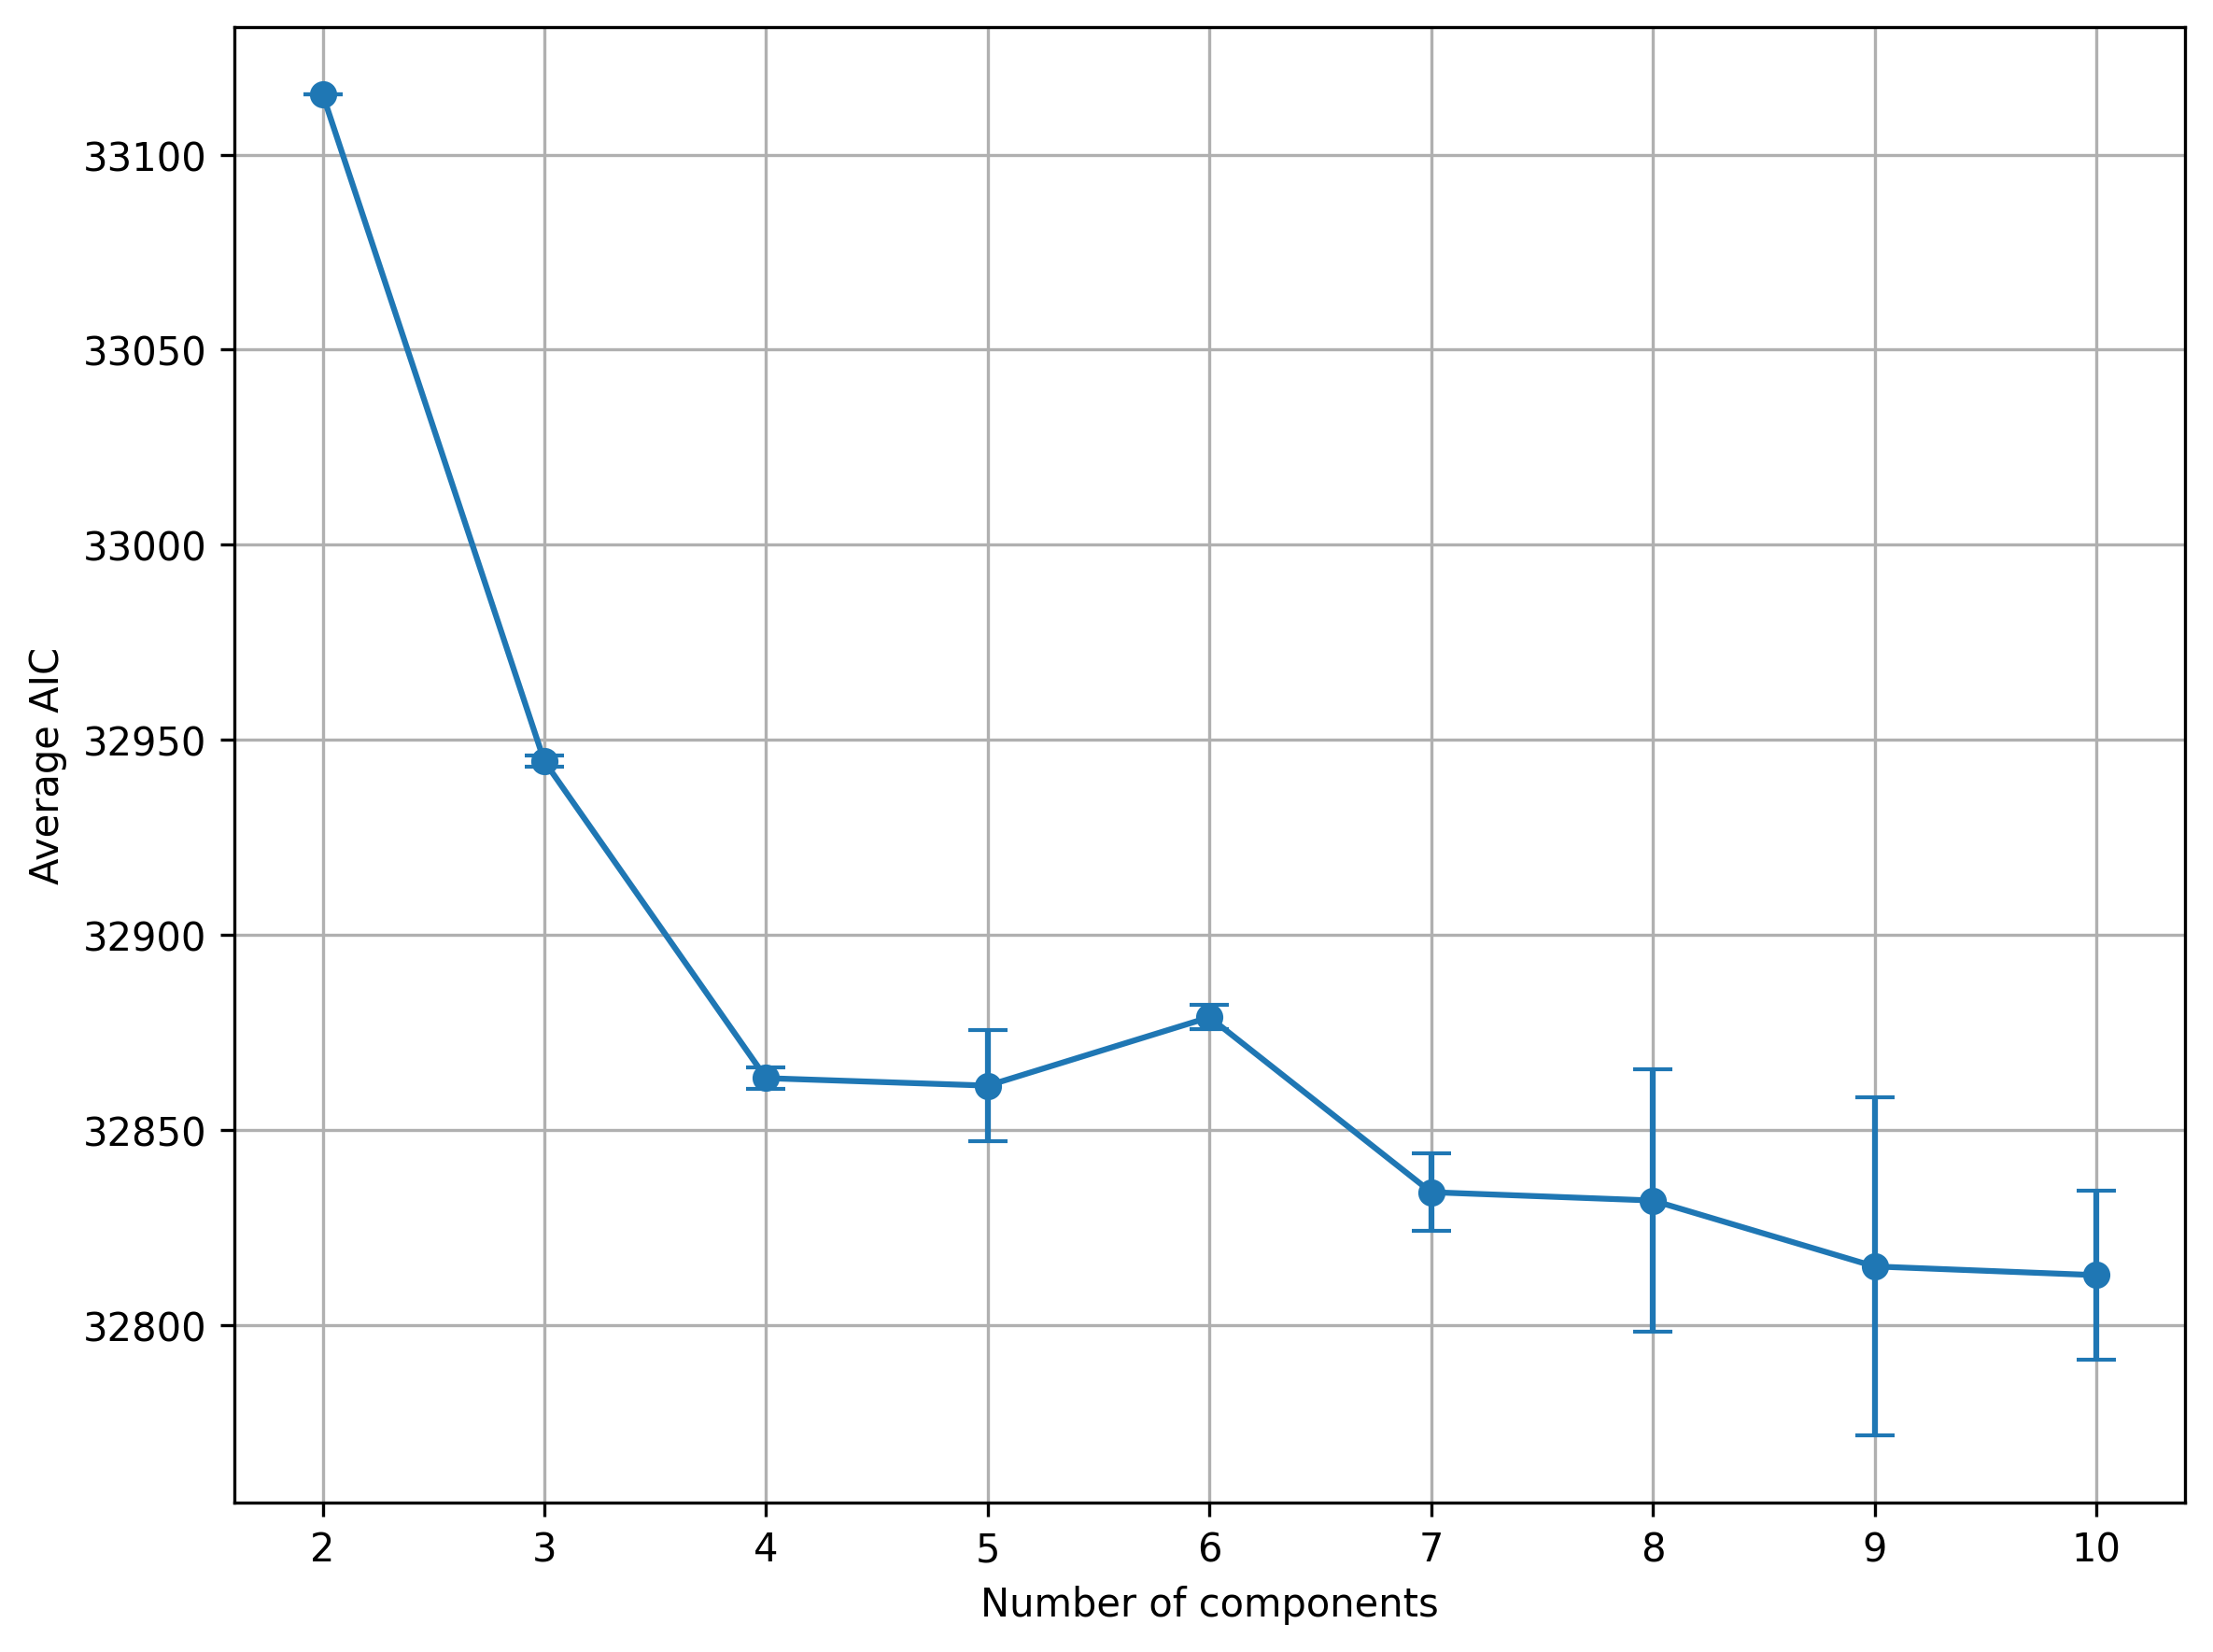

In [74]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Define the number of Monte Carlo iterations
n_iterations = 10

# Define the range of n_components values
components_range = range(2, 11)

# Lists to store average AIC values and their standard deviations
avg_aic_values = []
std_aic_values = []

for n in components_range:
    iteration_aics = []
    
    for _ in range(n_iterations):
        # Fit the Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n)
        gmm.fit(co2_at)
        
        # Append the AIC for this iteration
        iteration_aics.append(gmm.aic(co2_at))
    
    # Calculate the average AIC and its standard deviation
    avg_aic = np.mean(iteration_aics)
    std_aic = np.std(iteration_aics)
    
    avg_aic_values.append(avg_aic)
    std_aic_values.append(std_aic)

# Plot average AIC values with error bars
plt.figure(figsize=(8, 6),dpi=300)
plt.errorbar(components_range, avg_aic_values, yerr=std_aic_values, fmt='-o', capsize=5)

plt.xlabel('Number of components')
plt.ylabel('Average AIC')
plt.grid(True)
plt.xticks(components_range)
plt.tight_layout()
plt.show()


# Fit the GMM and get the label

In [89]:
from sklearn.mixture import GaussianMixture


# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)  # Adjust n_components as needed
gmm.fit(co2_at)

labels = gmm.predict(co2_at)


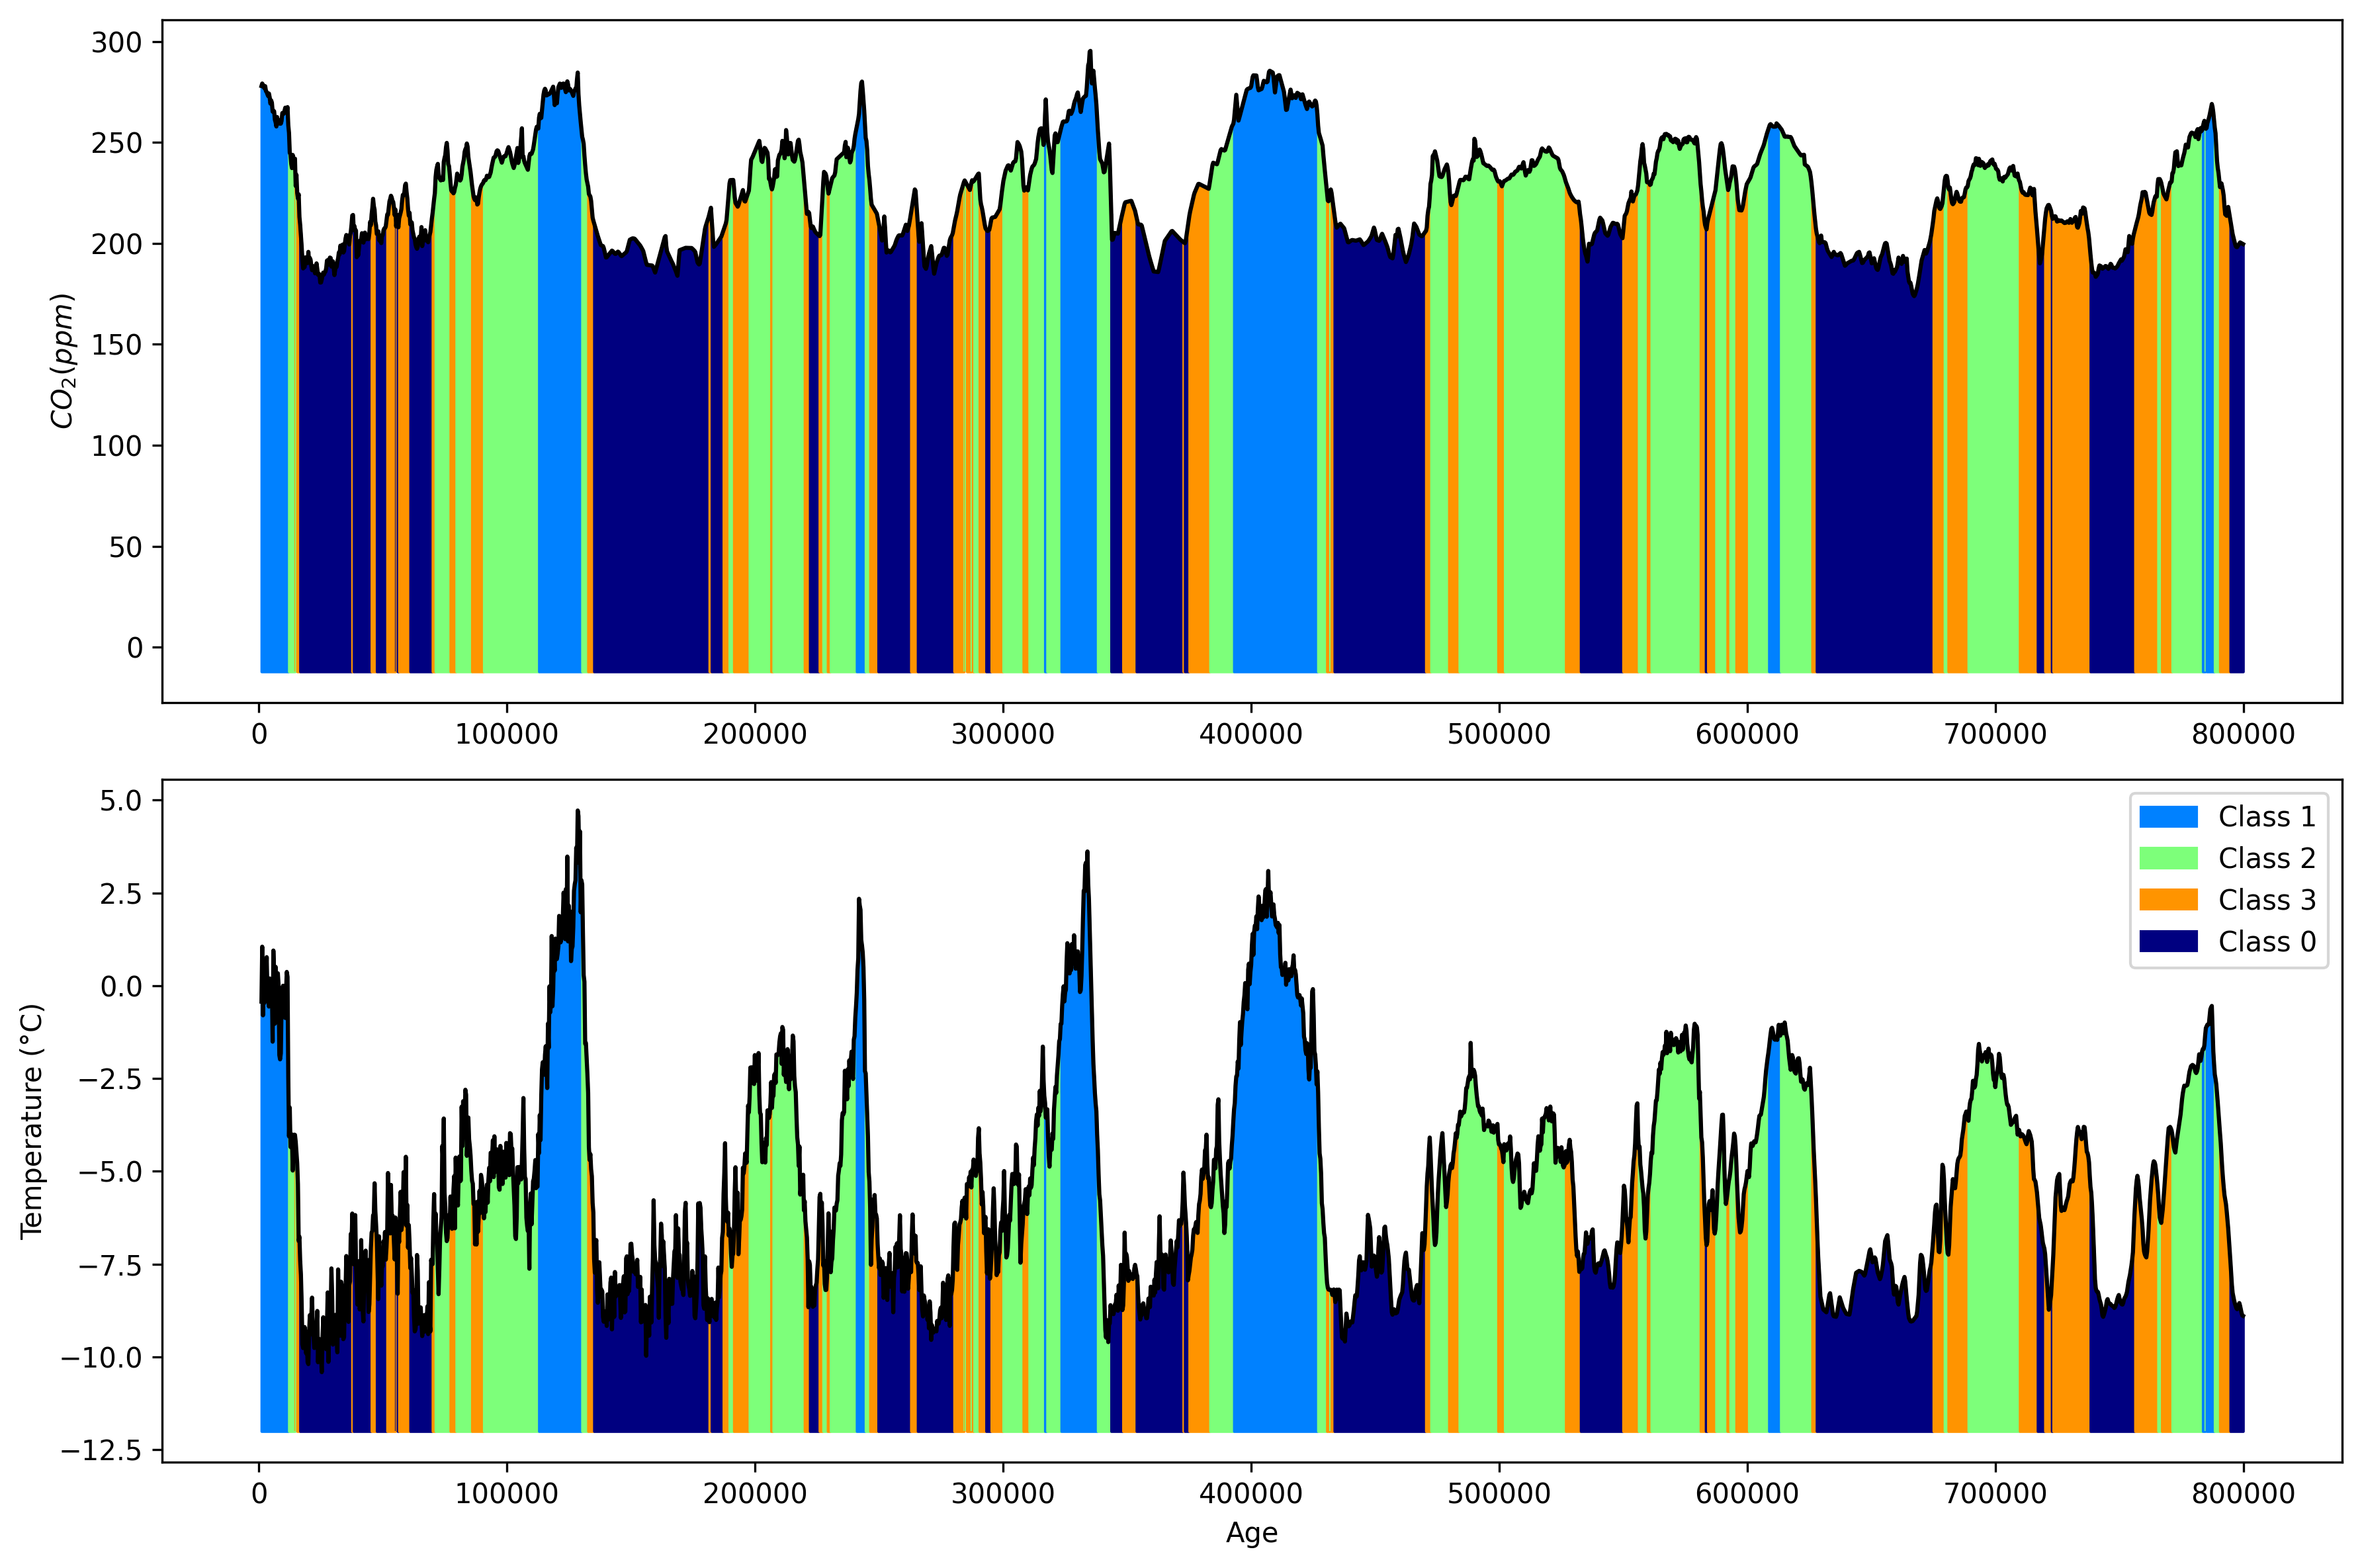

In [90]:
import matplotlib.pyplot as plt

# Create a new figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8),dpi=300)

n_unique_labels = len(np.unique(labels))

# Function to handle the plotting and filling for both CO2 and Temperature
def plot_filled(ax, x, y, labels, title, ylabel, show_legend=False):
    start = 0  # starting index for each segment
    handled_labels = []  # To keep track of which labels have been added to the legend

    for i in range(1, len(labels)):
        # If label changes, fill the segment and update start
        if labels[i] != labels[i-1]:
            label_str = None
            if labels[start] not in handled_labels:
                label_str = f"Class {labels[start]}"
                handled_labels.append(labels[start])

            ax.fill_between(x[start:i], y[start:i], -12, color=plt.cm.jet(labels[start] / n_unique_labels), label=label_str)  
            start = i

    # Handle the last segment
    ax.fill_between(x[start:], y[start:], -12, color=plt.cm.jet(labels[start] / n_unique_labels))  

    # Plot the actual data on top
    ax.plot(x, y, color='k')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    if show_legend:
        ax.legend(loc='upper right')

# Using the function for CO2 and Temperature
plot_filled(ax[0], co2_interp['Age'], co2_interp['CO2'], labels, '', '$CO_2 (ppm)$', show_legend=False)
plot_filled(ax[1], at_interp['Age'], at_interp['Temperature'], labels, '', 'Temperature (°C)', show_legend=True)
ax[1].set_xlabel('Age')

# Display the figure
plt.tight_layout()
plt.show()


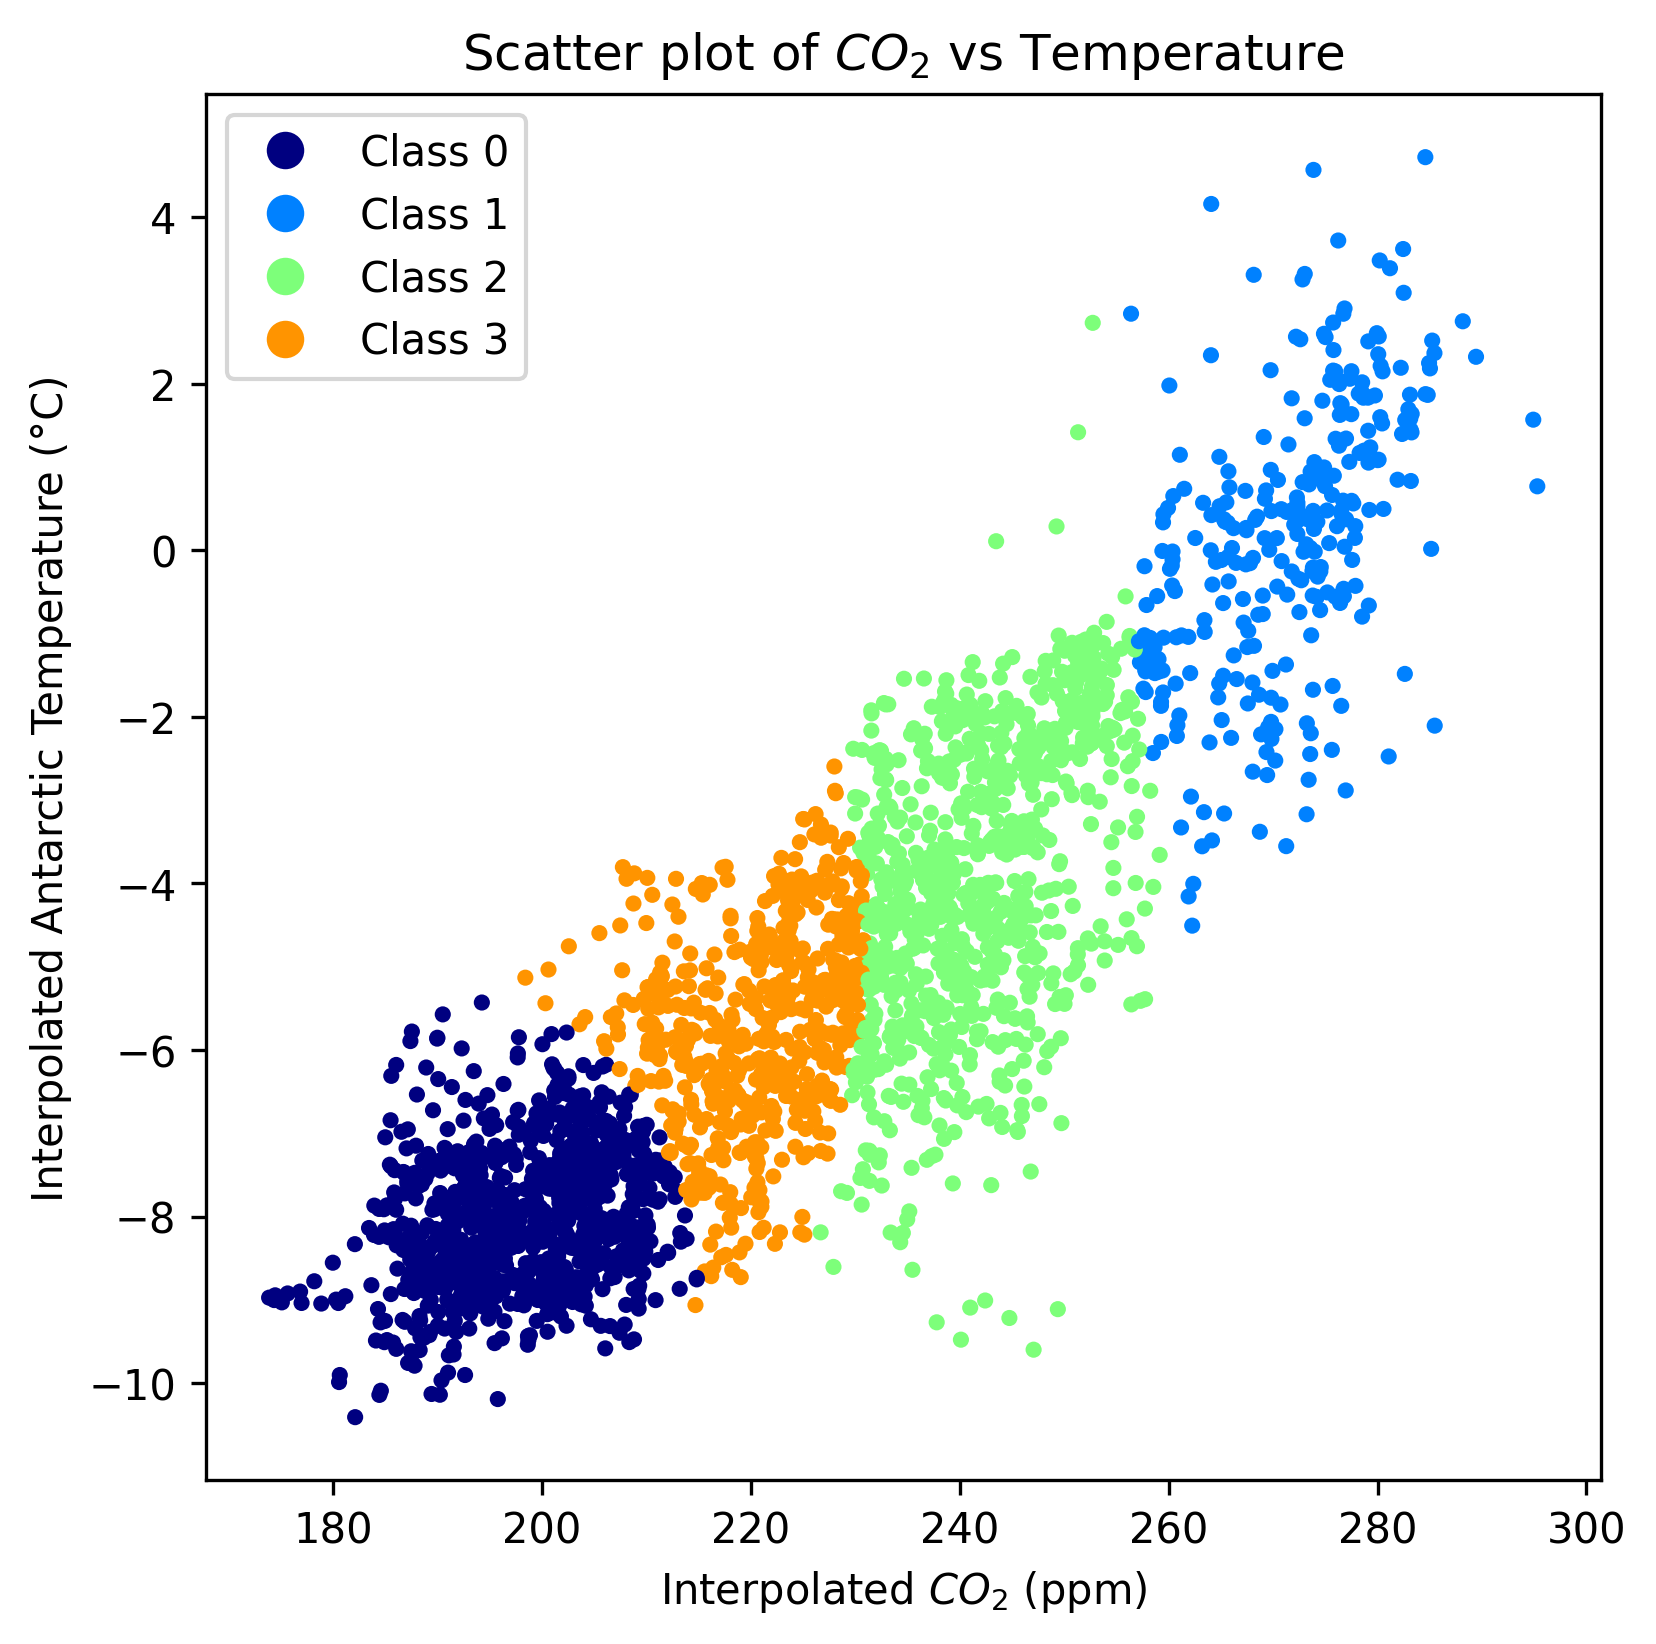

In [91]:
import matplotlib.pyplot as plt
import numpy as np

n_unique_labels = len(np.unique(labels))

# Generate colors for each data point in scatter plot
colors = [plt.cm.jet(label / n_unique_labels) for label in labels]

fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

# Scatter plot
sc = ax.scatter(co2_interp['CO2'], at_interp['Temperature'], c=colors, s=15, edgecolors='none')

# To create a legend, we can use Line2D
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.jet(i / n_unique_labels), markersize=10, label=f'Class {i}') for i in np.unique(labels)]

ax.legend(handles=legend_elements, loc='upper left')

# Setting title and labels
ax.set_title('Scatter plot of $CO_{2}$ vs Temperature')
ax.set_xlabel('Interpolated $CO_2$ (ppm)')
ax.set_ylabel('Interpolated Antarctic Temperature (°C)')

plt.show()
